### Лабораторная работа №4: Классификация. Деревья решений
#### Выполнил студент группы 6131-010402D Кришталь Кирилл

### 1. Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv("water_potability.csv")

### 2.1 Описание датасета 

#### Этот набор данных содержит измерения качества воды и оценки, связанные с переносимостью, то есть пригодностью воды для потребления человеком. Основная цель наборов данных - дать представление о параметрах качества воды и помочь определить, пригодна ли вода для питья или нет. Каждая строка в наборе данных представляет собой образец воды с определенными атрибутами, а столбец "Переносимость" указывает, пригодна ли вода для употребления.

| Признак | Описание | Единицы измерения |
|:-------:|:--------:|:-----------------:|
| pH | Уровень pH воды | numeric |
| Hardness | Жесткость воды, мера содержания минералов | numeric |
| Solids | Общие растворенные твердые вещества в воде. | numeric |
| Chloramines | Концентрация хлорамина в воде. | numeric |
| Sulfate | Концентрация сульфатов в воде. | numeric |
| Conductivity | Электропроводность воды. | numeric | 
| Organic_carbon | Содержание органического углерода в воде. | numeric |
| Trihalomethanes | Концентрация тригалометанов в воде. | numeric |
| Turbidity | Уровень мутности, мера чистоты воды. | numeric |
| Potability | Целевая переменная; указывает на пригодность воды для питья, с значениями 1 (пригодная для питья) и 0 (непригодная для питья).  | binary |




In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### 2.2 Предобработка данных

In [5]:
df.isna().any().any()

True

Заменим значения "NaN" средним по столбцу

In [6]:
df.fillna(df.mean(), inplace = True)

df.isna().any().any()

False

### 2.4 Нормализация данных

In [7]:
x_water = df.drop("Potability", axis = 1)
y_water = df["Potability"]

water_scale = MinMaxScaler()
water_scaled = water_scale.fit_transform(x_water)
water_scaled_df = pd.DataFrame(water_scaled, columns = x_water.columns)

In [8]:
water_scaled_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120


### 2.5 Разбивка выборки на обучающую и тестовую

In [9]:
x_train_water, x_test_water, y_train_water, y_test_water = train_test_split(x_water, y_water, test_size= 0.3, random_state= 42)

### 3. Дерево решений
#### 3.1 С использованием GridSearchCV осуществить подбор гиперпараметра DesicionTreeClassifier

In [10]:
grid = {
    'max_depth': range(1, x_water.shape[1]),
    'max_features': range(2, 20),
    'min_samples_leaf': range(5, 20)
}

model = DecisionTreeClassifier()

search = GridSearchCV(model, grid, cv = 5)
search.fit(x_train_water, y_train_water)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 9), 'max_features': range(2, 20),
                         'min_samples_leaf': range(5, 20)})

### 3.2 Вывести значение гиперпараметра и метрик для наилучшей модели DecisionTreeClassifier

In [11]:
search.best_params_

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 13}

In [12]:
best_model = search.best_estimator_

In [13]:
print(f'Accuracy:\t{accuracy_score(y_train_water, best_model.predict(x_train_water))}')
print(f'Precision:\t{precision_score(y_train_water, best_model.predict(x_train_water))}')
print(f'Recall:\t{recall_score(y_train_water, best_model.predict(x_train_water))}')
print(f'F-measure:\t{f1_score(y_train_water, best_model.predict(x_train_water))}')

Accuracy:	0.6515481901439163
Precision:	0.7100371747211895
Recall:	0.20942982456140352
F-measure:	0.32345469940728194


### 3.3 Для получения наилучшего дерева вывести feature_importances, отсортировать по убыванию

In [14]:
feature_importances = best_model.feature_importances_

feature_importance_dict = {feature: importance for feature, importance in zip(x_train_water.columns, feature_importances)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Отсортированные значения feature_importances по убыванию:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Отсортированные значения feature_importances по убыванию:
ph: 0.4551145477763307
Sulfate: 0.35079331749872356
Hardness: 0.1654361707657211
Solids: 0.01724332488796668
Conductivity: 0.011412639071257955
Chloramines: 0.0
Organic_carbon: 0.0
Trihalomethanes: 0.0
Turbidity: 0.0


### 3.4 Осуществить фильтрацию признаков 

In [15]:
threshold = np.mean([value for _, value in sorted_feature_importance])
selected_features = [feature for feature, value in sorted_feature_importance if value > threshold]
selected_features

['ph', 'Sulfate', 'Hardness']

### 3.5 Подобрать лучшую модель с использованием GridSearchCV на обучающей выборке с отфильтрованными признаками 

In [16]:
x_train_filtered = x_train_water[selected_features]

search_filtered = GridSearchCV(model, grid, cv = 5, n_jobs= -1, verbose= 2)
search_filtered.fit(x_train_filtered, y_train_water)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 9), 'max_features': range(2, 20),
                         'min_samples_leaf': range(5, 20)},
             verbose=2)

### 3.6 Вывести полученные гиперпараметры лучшей модели

In [17]:
search_filtered.best_params_

{'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 10}

### 3.7 Сравнить метрики до и после фильтрации признаков лучших моделей

In [18]:
best_model_filtered = search_filtered.best_estimator_

In [19]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, best_model.predict(x_train_water))}')
print(f'Precision:\t{precision_score(y_train_water, best_model.predict(x_train_water))}')
print(f'Recall:\t{recall_score(y_train_water, best_model.predict(x_train_water))}')
print(f'F-measure:\t{f1_score(y_train_water, best_model.predict(x_train_water))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, best_model_filtered.predict(x_train_filtered))}')
print(f'Precision:\t{precision_score(y_train_water, best_model_filtered.predict(x_train_filtered))}')
print(f'Recall:\t{recall_score(y_train_water, best_model_filtered.predict(x_train_filtered))}')
print(f'F-measure:\t{f1_score(y_train_water, best_model_filtered.predict(x_train_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.6515481901439163
Precision:	0.7100371747211895
Recall:	0.20942982456140352
F-measure:	0.32345469940728194
-----------AFTER FILTER-----------
Accuracy:	0.667684256432621
Precision:	0.6884422110552764
Recall:	0.30043859649122806
F-measure:	0.4183206106870229


Метрики немного ухудшились

### 4. Случайный лес
#### 4.1 Построить случайный лес (Random Forest Classifier), с использованием GridSearchCV осуществить подбор гиперпараметра

In [20]:
forest_model = RandomForestClassifier()

forest_grid = {
    'max_depth': range(1, x_water.shape[1]),
    'n_estimators': range(10, 160, 5)
}

forest_search = GridSearchCV(forest_model, forest_grid, cv = 5, n_jobs= -1, verbose= 2)
forest_search.fit(x_train_water, y_train_water)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 9),
                         'n_estimators': range(10, 160, 5)},
             verbose=2)

### 4.2 Вывести полученные гиперпараметры лучшей модели случайного леса

In [21]:
forest_search.best_params_

{'max_depth': 8, 'n_estimators': 150}

### 4.3 Осуществить фильтрацию признаков

In [22]:
forest_best_model = forest_search.best_estimator_

In [23]:
forest_features = zip(x_train_water.columns, forest_best_model.feature_importances_)
forest_features = sorted(forest_features, key=lambda x: x[1], reverse=True)
forest_len_max = max([len(col) for col in x_train_water.columns])
for f_name, f_val in forest_features:
    print(f"{f_name:<{forest_len_max}} importance: {f_val:.5f}")

Sulfate         importance: 0.17286
ph              importance: 0.15673
Hardness        importance: 0.14102
Chloramines     importance: 0.12770
Solids          importance: 0.10459
Organic_carbon  importance: 0.07859
Conductivity    importance: 0.07479
Turbidity       importance: 0.07188
Trihalomethanes importance: 0.07184


In [24]:
forest_threshold = np.mean([value for _, value in forest_features])
forest_selected_features = [feature for feature, value in forest_features if value > forest_threshold]
forest_selected_features

['Sulfate', 'ph', 'Hardness', 'Chloramines']

### 4.4 Подобрать лучшую модель с использованием GridSearchCV на обучающей выборке с отфильтрованными признаками.

In [25]:
x_train_forest_filtered = x_train_water[forest_selected_features]
x_train_forest_filtered.head()

,Sulfate,ph,Hardness,Chloramines
2985,382.009477,7.080795,188.445469,8.040356
1073,271.892045,7.203439,168.445358,6.283250
3140,340.348645,7.080795,242.827588,5.853840
2643,333.775777,6.056818,211.765886,9.507303
2174,333.775777,9.581189,223.296216,5.665431


In [26]:
forest_search_f = GridSearchCV(forest_model, forest_grid, cv = 5, n_jobs= -1, verbose = 2)
forest_search_f.fit(x_train_forest_filtered, y_train_water)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 9),
                         'n_estimators': range(10, 160, 5)},
             verbose=2)

### 4.5 Вывести полученные гиперпараметры лучшей модели случайного леса.

In [27]:
forest_search_f.best_params_

{'max_depth': 8, 'n_estimators': 75}

### 4.6 Сравнить метрики до и после фильтрации признаков лучших моделей.

In [28]:
forest_best_model_filtered = forest_search_f.best_estimator_

In [29]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, forest_best_model.predict(x_train_water))}')
print(f'Precision:\t{precision_score(y_train_water, forest_best_model.predict(x_train_water))}')
print(f'Recall:\t{recall_score(y_train_water, forest_best_model.predict(x_train_water))}')
print(f'F-measure:\t{f1_score(y_train_water, forest_best_model.predict(x_train_water))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, forest_best_model_filtered.predict(x_train_forest_filtered))}')
print(f'Precision:\t{precision_score(y_train_water, forest_best_model_filtered.predict(x_train_forest_filtered))}')
print(f'Recall:\t{recall_score(y_train_water, forest_best_model_filtered.predict(x_train_forest_filtered))}')
print(f'F-measure:\t{f1_score(y_train_water, forest_best_model_filtered.predict(x_train_forest_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.7614478848669864
Precision:	1.0
Recall:	0.40021929824561403
F-measure:	0.5716523101018011
-----------AFTER FILTER-----------
Accuracy:	0.7579590056694286
Precision:	0.976
Recall:	0.40131578947368424
F-measure:	0.5687645687645687


Можно считать, что метрики изменились незначительно

### 5. Метод ближайших соседей
#### 5.1 С использованием GridSearchCV осуществить подбор гиперпараметра KNeighborsClassifier (n_neighbors).

In [30]:
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors': range(2, 50)}

knn_search = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs=-1, verbose=2)
knn_search.fit(x_train_water, y_train_water)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=2)

### 5.2 Вывести значения гиперпараметра и метрик для наилучшей модели.

In [31]:
knn_search.best_params_

{'n_neighbors': 32}

### 5.3 Осуществить фильтрацию признаков.
Для KNN feature_importances_ не определены, поэтому возьмем фильтрацию от DecisionTree Classifier

In [32]:
knn_filtered = selected_features
x_train_knn_filtered = x_train_water[knn_filtered]
x_train_knn_filtered.head()

,ph,Sulfate,Hardness
2985,7.080795,382.009477,188.445469
1073,7.203439,271.892045,168.445358
3140,7.080795,340.348645,242.827588
2643,6.056818,333.775777,211.765886
2174,9.581189,333.775777,223.296216


### 5.4 Подобрать лучшую модель с использованием GridSearchCV на обучающей выборке с отфильтрованными признаками.

In [33]:
knn_search_filtered = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs= -1, verbose= 2)
knn_search_filtered.fit(x_train_knn_filtered, y_train_water)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=2)

### 5.5 Вывести полученные гиперпараметры лучшей модели случайного леса.

In [34]:
knn_search_filtered.best_params_

{'n_neighbors': 45}

### 5.6 Сравнить метрики до и после фильтрации признаков.

In [35]:
knn_best_model = knn_search.best_estimator_
knn_best_model_f = knn_search_filtered.best_estimator_

In [36]:
print('-----------BEFORE FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, knn_best_model.predict(x_train_water))}')
print(f'Precision:\t{precision_score(y_train_water, knn_best_model.predict(x_train_water))}')
print(f'Recall:\t{recall_score(y_train_water, knn_best_model.predict(x_train_water))}')
print(f'F-measure:\t{f1_score(y_train_water, knn_best_model.predict(x_train_water))}')
print('-----------AFTER FILTER-----------')
print(f'Accuracy:\t{accuracy_score(y_train_water, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Precision:\t{precision_score(y_train_water, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Recall:\t{recall_score(y_train_water, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'F-measure:\t{f1_score(y_train_water, knn_best_model_f.predict(x_train_knn_filtered))}')

-----------BEFORE FILTER-----------
Accuracy:	0.610989969472307
Precision:	0.5515463917525774
Recall:	0.11732456140350878
F-measure:	0.19349005424954793
-----------AFTER FILTER-----------
Accuracy:	0.6354121238552115
Precision:	0.6104651162790697
Recall:	0.23026315789473684
F-measure:	0.3343949044585987


##### 6. Если наблюдается улучшение метрик после фильтрации признаков хотя бы для одной из моделей, то для набора отфильтрованных признаков (пересечение множеств отфильтрованных признаков каждой модели или объединение множеств – не особо важно, главное описать, каким образом получен новый subset данных) заново построить наилучшие модели KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, сравнить модели в пункте 7 на одинаковом полученном наборе отфильтрованных признаков. Иначе – пропустить этот пункт.

После фильтрации в kNN метрики улучшились. Возьму набор отфильтрованных данных после Decision Tree

In [37]:
x_train_filtereds = x_train_water[selected_features]
x_train_forest_filtereds = x_train_water[selected_features]
x_train_knn_filtereds = x_train_water[selected_features]

search_filtereds = GridSearchCV(model, grid, cv = 5, n_jobs= -1, verbose= 2)
search_filtereds.fit(x_train_filtereds, y_train_water)

forest_search_fs = GridSearchCV(forest_model, forest_grid, cv = 5, n_jobs= -1, verbose = 2)
forest_search_fs.fit(x_train_forest_filtereds, y_train_water)

knn_search_filtereds = GridSearchCV(knn_model, knn_grid, cv = 5, n_jobs= -1, verbose= 2)
knn_search_filtereds.fit(x_train_knn_filtereds, y_train_water)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=2)

### 7. Оценка качества построенных моделей
#### 7.1 Визуализировать любое полученное дерево решений.

[Text(0.3055555555555556, 0.9166666666666666, 'Sulfate <= 257.304\ngini = 0.479\nsamples = 2293\nvalue = [1381, 912]\nclass = Secondary'),
 Text(0.1111111111111111, 0.75, 'ph <= 6.706\ngini = 0.366\nsamples = 58\nvalue = [14, 44]\nclass = New building'),
 Text(0.05555555555555555, 0.5833333333333334, 'gini = 0.49\nsamples = 14\nvalue = [8, 6]\nclass = Secondary'),
 Text(0.16666666666666666, 0.5833333333333334, 'Conductivity <= 458.995\ngini = 0.236\nsamples = 44\nvalue = [6, 38]\nclass = New building'),
 Text(0.1111111111111111, 0.4166666666666667, 'gini = 0.08\nsamples = 24\nvalue = [1, 23]\nclass = New building'),
 Text(0.2222222222222222, 0.4166666666666667, 'gini = 0.375\nsamples = 20\nvalue = [5, 15]\nclass = New building'),
 Text(0.5, 0.75, 'Hardness <= 115.1\ngini = 0.475\nsamples = 2235\nvalue = [1367, 868]\nclass = Secondary'),
 Text(0.4444444444444444, 0.5833333333333334, 'gini = 0.34\nsamples = 23\nvalue = [5, 18]\nclass = New building'),
 Text(0.5555555555555556, 0.58333333

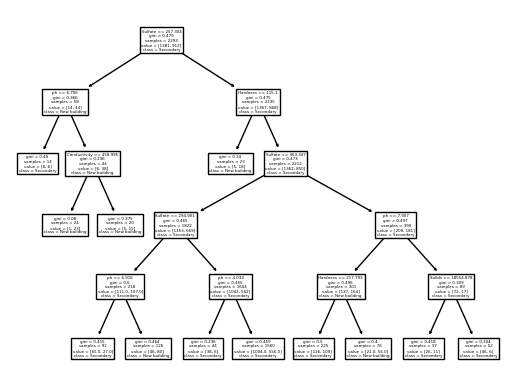

In [38]:
plot_tree(decision_tree=best_model, feature_names=x_train_water.columns, class_names=['Secondary','New building'])

### 7.2 Сравнения моделей на одинаковом наборе после фильтрации

In [39]:
decision_best_model_filtereds = search_filtereds.best_estimator_
forest_best_model_filtereds = forest_search_fs.best_estimator_
knn_best_model_filtereds = knn_search_filtereds.best_estimator_

In [40]:
decision_model_filtered_predicts = decision_best_model_filtereds.predict(x_train_filtereds)
forest_model_filtered_predicts = forest_best_model_filtereds.predict(x_train_forest_filtereds)
knn_model_filtered_predicts = knn_best_model_filtereds.predict(x_train_knn_filtereds)

decision_model_accs = accuracy_score(y_train_water, decision_model_filtered_predicts)
forest_model_accs = accuracy_score(y_train_water, forest_model_filtered_predicts)
knn_model_accs = accuracy_score(y_train_water, knn_model_filtered_predicts)

decision_model_precs = precision_score(y_train_water, decision_model_filtered_predicts)
forest_model_precs = precision_score(y_train_water, forest_model_filtered_predicts)
knn_model_precs = precision_score(y_train_water, knn_model_filtered_predicts)

decision_model_recs = recall_score(y_train_water, decision_model_filtered_predicts)
forest_model_recs = recall_score(y_train_water, forest_model_filtered_predicts)
knn_model_recs = recall_score(y_train_water, knn_model_filtered_predicts)

decision_model_f1s = f1_score(y_train_water, decision_model_filtered_predicts)
forest_model_f1s = f1_score(y_train_water, forest_model_filtered_predicts)
knn_model_f1s = f1_score(y_train_water, knn_model_filtered_predicts)



print('-----------DECISION TREE-----------')
print(f"Accuracy: {decision_model_accs}; Precision: {decision_model_precs}; Recall: {decision_model_recs}; F1_score: {decision_model_f1s}")
print('-----------RANDOM FOREST-----------')
print(f"Accuracy: {forest_model_accs}; Precision: {forest_model_precs}; Recall: {forest_model_recs}; F1_score: {forest_model_f1s}")
print('-----------KNN-----------')
print(f"Accuracy: {knn_model_accs}; Precision: {knn_model_precs}; Recall: {knn_model_recs}; F1_score: {knn_model_f1s}")

-----------DECISION TREE-----------
Accuracy: 0.6681203663323158; Precision: 0.6930946291560103; Recall: 0.29714912280701755; F1_score: 0.41596316193399846
-----------RANDOM FOREST-----------
Accuracy: 0.73222852158744; Precision: 0.9138888888888889; Recall: 0.3607456140350877; F1_score: 0.5172955974842768
-----------KNN-----------
Accuracy: 0.6358482337549063; Precision: 0.6156156156156156; Recall: 0.22478070175438597; F1_score: 0.3293172690763052


### 7.3 Сравнить лучшие модели KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier на тестовой выборке. Привести значения метрик.

In [41]:
print('-----------DECISION TREE-----------')
print(f'Accuracy:\t{accuracy_score(y_test_water, best_model.predict(x_test_water))}')
print(f'Precision:\t{precision_score(y_test_water, best_model.predict(x_test_water))}')
print(f'Recall:\t{recall_score(y_test_water, best_model.predict(x_test_water))}')
print(f'F-measure:\t{f1_score(y_test_water, best_model.predict(x_test_water))}')
print('-----------RANDOM FOREST-----------')
print(f'Accuracy:\t{accuracy_score(y_test_water, forest_best_model.predict(x_test_water))}')
print(f'Precision:\t{precision_score(y_test_water, forest_best_model.predict(x_test_water))}')
print(f'Recall:\t{recall_score(y_test_water, forest_best_model.predict(x_test_water))}')
print(f'F-measure:\t{f1_score(y_test_water, forest_best_model.predict(x_test_water))}')
print('-----------KNN-----------')
print(f'Accuracy:\t{accuracy_score(y_test_water, knn_best_model.predict(x_test_water))}')
print(f'Precision:\t{precision_score(y_test_water, knn_best_model.predict(x_test_water))}')
print(f'Recall:\t{recall_score(y_test_water, knn_best_model.predict(x_test_water))}')
print(f'F-measure:\t{f1_score(y_test_water, knn_best_model.predict(x_test_water))}')

-----------DECISION TREE-----------
Accuracy:	0.6520854526958291
Precision:	0.6176470588235294
Recall:	0.1721311475409836
F-measure:	0.2692307692307692
-----------RANDOM FOREST-----------
Accuracy:	0.6734486266531028
Precision:	0.7102803738317757
Recall:	0.20765027322404372
F-measure:	0.321353065539112
-----------KNN-----------
Accuracy:	0.6164801627670397
Precision:	0.4266666666666667
Recall:	0.08743169398907104
F-measure:	0.14512471655328799


Можно сказать что на обучающем наборе данных, что и на тестовом наборе модель "Random Forest" выдает лучшую точность по сравнению с другими моделями
